In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read in data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Calculate the euclidean distance between two points
def euclidean(p, q):
    return np.sqrt(np.sum((p - q)**2, axis=1))

In [4]:
def kmeans(X, k, n_iter=100):
    # initialize the cluster vector which indicates which cluster each row corresponds to 
    cluster = np.zeros(X.shape[0])
    
    # initialize the centroids with random points of the dataset
    rand_ix = np.random.randint(X.shape[0], size=k)
    centroids = X[rand_ix,:]
    
    for n in range(n_iter):
        for ix, row in enumerate(X):
            # calculate the distances between a given point and the centroids
            dist = euclidean(row, centroids)
            # find the lowest distance, i.e. the optimal cluster for the given point
            opt_cluster = np.argmin(dist)
            # update the cluster vector
            cluster[ix] = opt_cluster

        # compute mean of each cluster as the new centroids
        new_centroids = np.zeros(centroids.shape)
        for i in range(k):
            new_centroids[i] = np.mean(X[np.where(cluster==i)[0]], axis=0)
        
        centroids = new_centroids
    
    return centroids, cluster

In [5]:
# Calculate the total distance to determine the optimal k
def total_distance(X, cluster, centroids):
    total_dist = 0
    for i, centroid in enumerate(centroids):
        dist = np.sum(euclidean(centroid, X[np.where(cluster==i)[0]]), axis=0)
        total_dist += dist
        
    return total_dist

In [6]:
# Use annual income & spending score as the features
X = df.iloc[:, 3:].values

In [7]:
# Total distance against k 
distance_per_k = []
for k in range(1,11):
    centroids, cluster = kmeans(X, k, n_iter=100)
    distance = total_distance(X, cluster, centroids)
    distance_per_k.append(distance)

<AxesSubplot:>

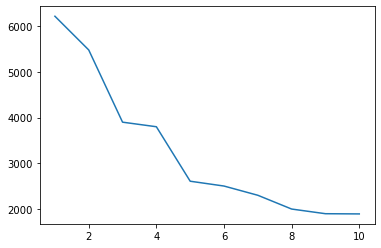

In [8]:
# Plot the result to find the 'elbow'
# Note: the proper elbow method uses the sum of squared distance (SSD) instead of the sum of distance
# The sum of distance is used here for simplicity
sns.lineplot(x=list(range(1,11)), y=distance_per_k)

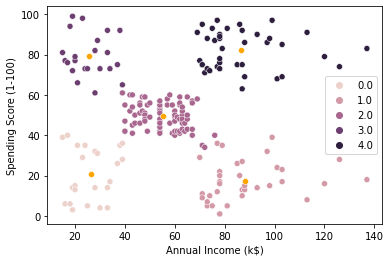

In [9]:
# Test the result with k=5
k = 5

centroids, cluster = kmeans(X, k, n_iter=100)

# Plot the result
data = pd.DataFrame(np.append(X, cluster.reshape(-1,1), axis=1),columns=list(df.columns[-2:])+['Cluster'])
sns.scatterplot(data=data, x='Annual Income (k$)',y='Spending Score (1-100)', hue='Cluster')
for centroid in centroids:
    sns.scatterplot(x=[centroid[0]], y=[centroid[1]], color='orange')